<a href="https://colab.research.google.com/github/ernesto-miguez/Machine-Learning-training/blob/master/Time_Series_Prediction_using_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://towardsdatascience.com/time-series-prediction-using-prophet-in-python-35d65f626236

# TIME SERIES FORECASTING USING PROPHET

##*Prophet time series = Trend + Seasonality + Holiday + error*



*   Trend models non periodic changes in the value of the time series.
*   Seasonality is the periodic changes like daily, weekly, or yearly seasonality.
*   Holiday effect which occur on irregular schedules over a day or a period of days.
*   Error terms is what is not explained by the model.

In [1]:
!pip install fbprophet
!pip install plotly

In [1]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode()
%matplotlib inline

In [3]:
dataset = pd.read_csv('avocado.csv')
dataset.drop(['Unnamed: 0'], axis='columns', inplace=True)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [5]:
dataset.describe(include='O')

Date          type  region
count        18249         18249   18249
unique         169             2      54
top     2017-04-23  conventional  Albany
freq           108          9126     338

## Converting categorical variable to numeric using LabelEncoder

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset.iloc[:,10] = le.fit_transform(dataset.iloc[:,10])
dataset.head(2)

Date  AveragePrice  Total Volume  ...  type  year  region
0  2015-12-27          1.33      64236.62  ...     0  2015  Albany
1  2015-12-20          1.35      54876.98  ...     0  2015  Albany

[2 rows x 13 columns]

## Creating input features(X) and target variable(y)


In [8]:
X= dataset[['Date', 'Total Volume', '4046', '4225', '4770',
 'Small Bags', 'Large Bags', 'XLarge Bags', 'type']]
y= dataset.iloc[:,1]

## Creating the data set for Prophet


In [9]:
train_dataset = pd.DataFrame()
train_dataset['ds'] = pd.to_datetime(X['Date'])
train_dataset['y'] = y
train_dataset.head()

ds     y
0 2015-12-27  1.33
1 2015-12-20  1.35
2 2015-12-13  0.93
3 2015-12-06  1.08
4 2015-11-29  1.28

## Creating and fitting the Prophet Model with default values

In [10]:
prophet_basic = Prophet()
prophet_basic.fit(train_dataset)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Predicting values for the future

In [11]:
future = prophet_basic.make_future_dataframe(periods=300)
future.tail()

ds
464 2019-01-15
465 2019-01-16
466 2019-01-17
467 2019-01-18
468 2019-01-19

In [12]:
forecast = prophet_basic.predict(future)

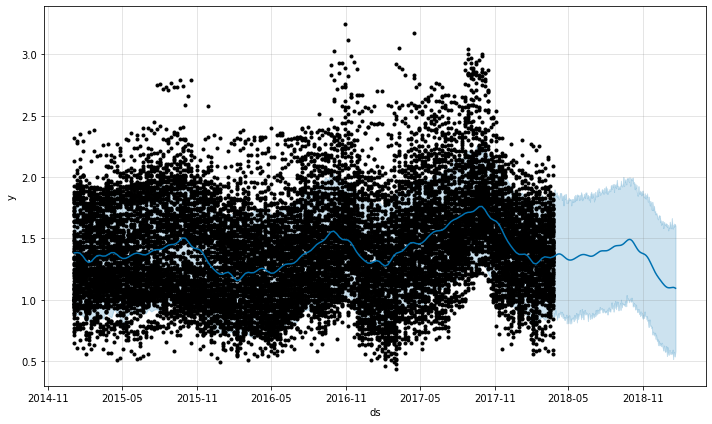

In [13]:
fig1 = prophet_basic.plot(forecast)

## Plotting the forecasted components

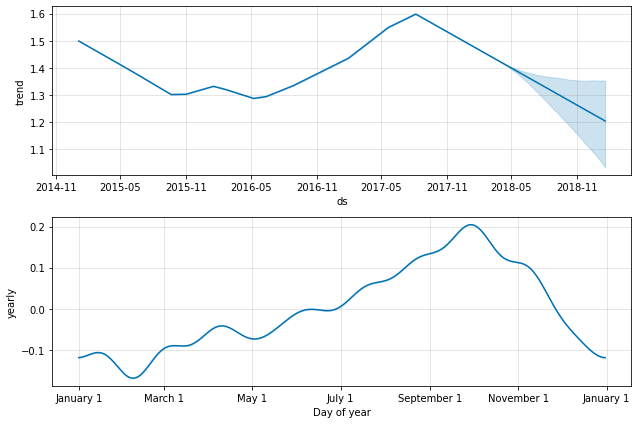

In [14]:
fig1 = prophet_basic.plot_components(forecast)

## Adding ChangePoints to Prophet

In [15]:
from fbprophet.plot import add_changepoints_to_plot


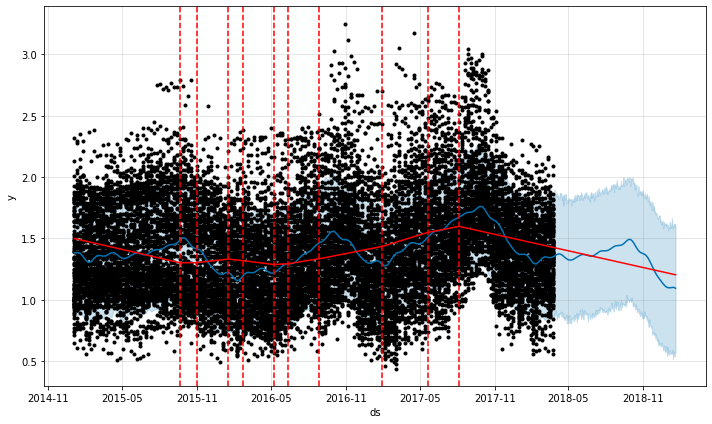

In [16]:
from fbprophet.plot import add_changepoints_to_plot

fig = prophet_basic.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet_basic, forecast)

In [17]:
prophet_basic.changepoints

584     2015-02-08
1168    2015-03-15
1752    2015-04-26
2336    2015-05-31
2920    2015-07-12
3504    2015-08-16
4087    2015-09-20
4671    2015-11-01
5255    2015-12-06
5839    2016-01-17
6423    2016-02-21
7007    2016-03-27
7591    2016-05-08
8175    2016-06-12
8759    2016-07-24
9343    2016-08-28
9927    2016-10-02
10511   2016-11-13
11094   2016-12-18
11678   2017-01-29
12262   2017-03-05
12846   2017-04-09
13430   2017-05-21
14014   2017-06-25
14598   2017-08-06
Name: ds, dtype: datetime64[ns]

## Make another prophet 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


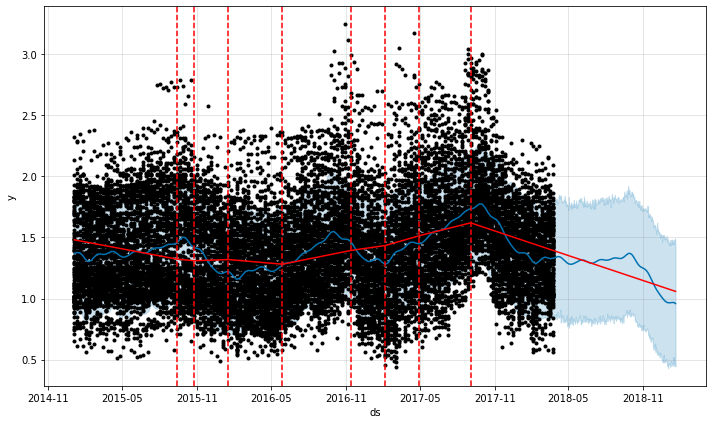

In [18]:
pro_change = Prophet(changepoint_range=0.9)

forecast = pro_change.fit(train_dataset).predict(future)
fig = pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


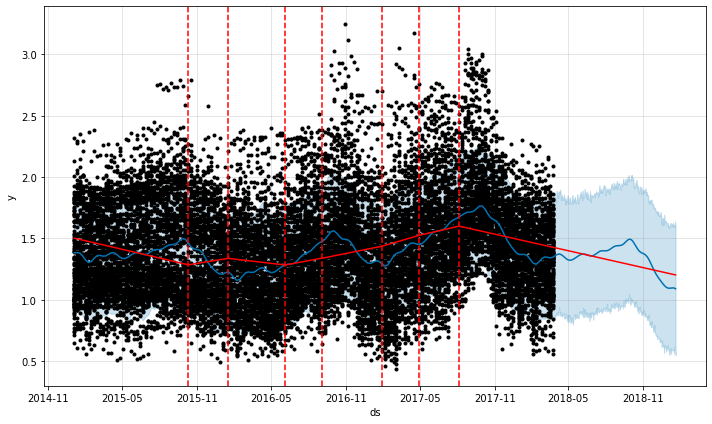

In [19]:
pro_change = Prophet(n_changepoints=20, yearly_seasonality=True)

forecast = pro_change.fit(train_dataset).predict(future)
fig = pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

## Adjusting trend

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


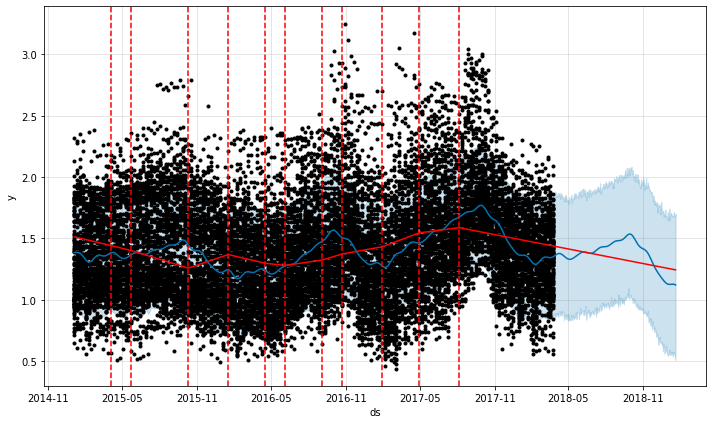

In [20]:
# We change the changepoint_prior_scale parameter to 0.08 from the default 0.05 in order to make the trend more flexible
pro_change = Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.08)

forecast = pro_change.fit(train_dataset).predict(future)
fig = pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


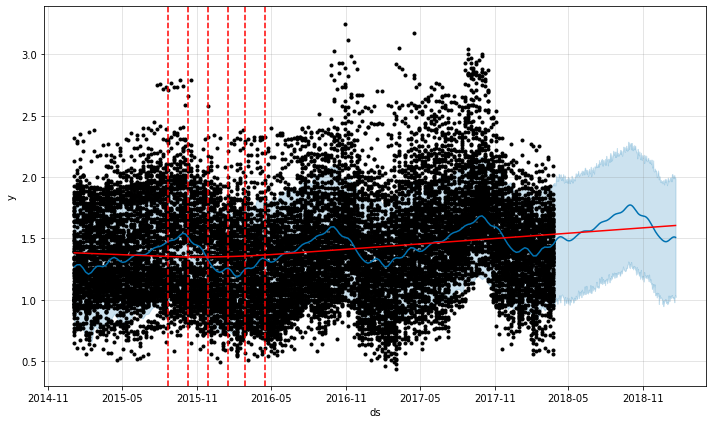

In [21]:
# Decrease the changepoint_prior_scale to 0.001 to make the trend less flexible
pro_change = Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.001)

forecast = pro_change.fit(train_dataset).predict(future)
fig = pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

## Adding Holidays

In [22]:
# We set lower_window = -1 to include a day prior to the given date
avocado_season = pd.DataFrame({
  'holiday': 'avocado season',
  'ds': pd.to_datetime(['2014-07-31', '2014-09-16', 
                        '2015-07-31', '2015-09-16',
                        '2016-07-31', '2016-09-16',
                        '2017-07-31', '2017-09-16',
                        '2018-07-31', '2018-09-16',
                        '2019-07-31', '2019-09-16']),
  'lower_window': -1,
  'upper_window': 0,
})

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


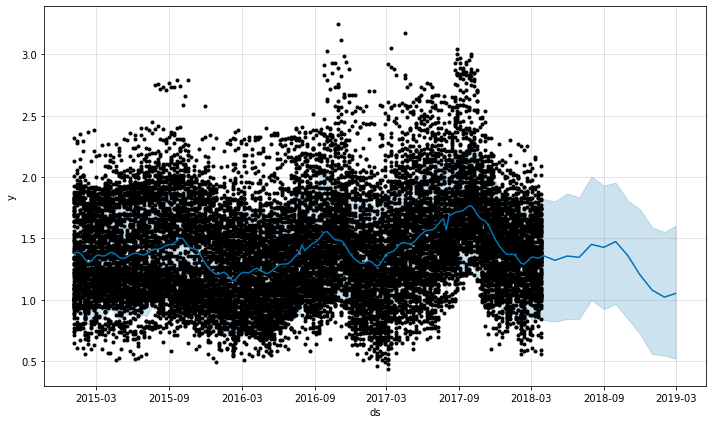

In [25]:
pro_holiday = Prophet(holidays=avocado_season)
pro_holiday.fit(train_dataset)
future_data = pro_holiday.make_future_dataframe(periods = 12, freq = 'm')

# Forecast the data for future data

forecast_data = pro_holiday.predict(future_data)
pro_holiday.plot(forecast_data);

## Adding Multiple Regressors

In [30]:
train_dataset['type'] = X['type']
train_dataset['Total Volume'] = X['Total Volume']
train_dataset['4046'] = X['4046']
train_dataset['4225'] = X['4225']
train_dataset['4770'] = X['4770']
train_dataset['Small Bags'] = X['Small Bags']
train_X= train_dataset[:18000]
test_X= train_dataset[18000:]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


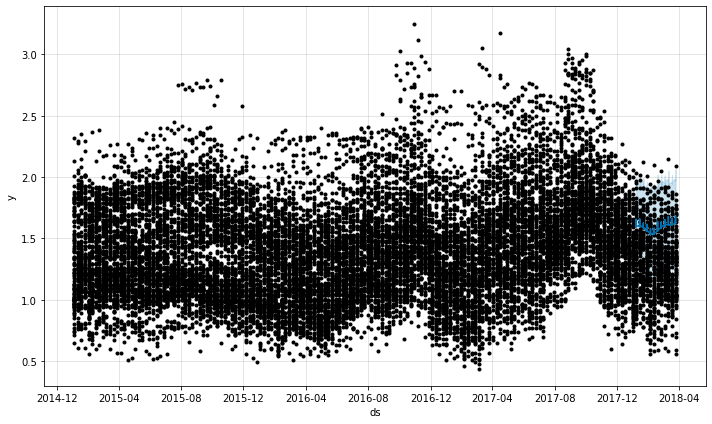

In [31]:
#Additional Regressor
pro_regressor= Prophet()
pro_regressor.add_regressor('type')
pro_regressor.add_regressor('Total Volume')
pro_regressor.add_regressor('4046')
pro_regressor.add_regressor('4225')
pro_regressor.add_regressor('4770')
pro_regressor.add_regressor('Small Bags')
#Fitting the data
pro_regressor.fit(train_X)
future_data = pro_regressor.make_future_dataframe(periods=249)
#forecast the data for Test  data
forecast_data = pro_regressor.predict(test_X)
pro_regressor.plot(forecast_data);